In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### utility functions

In [5]:
def generate_y(x: np.ndarray):
    return x[:,0] * 1 + x[:,1] * 2 + x[:,2] * 3 + x[:,3] * 4 + x[:,4] * 5

In [6]:
def relu(x: np.ndarray):
    return np.maximum(0,x)

In [7]:
def d_relu(x: np.ndarray):
    return x > 0

In [8]:
def mse_loss(y: np.ndarray, label: np.ndarray):
    error = 0
    for i in range(len(y)):
        error += (y[i,0] - label[i,0])**2
    return error

In [9]:
def d_mse_loss(y: np.ndarray, label: np.ndarray):
    return 2*(y - label)

### neural net

In [10]:
class Layer:
    def __init__(self,data_size, feature_number, neuron_number, linear: bool, lr: float, final: bool):
        self.input = np.random.rand(data_size,feature_number)
        self.weight = np.random.rand(feature_number,neuron_number)
        self.output = np.random.rand(data_size,1)
        self.linear = linear
        self.lr = lr
        self.final = final

    def forward(self, input: np.ndarray):
        self.input = input 
        if self.linear == True:
            self.output = np.dot(input, self.weight) 
        else:
            self.output = relu(np.dot(input,self.weight)) 
        self.z = np.dot(input, self.weight) 

    def backward(self, input: np.ndarray, lr: float, d_loss: np.ndarray):
        if self.final == True: # 
            self.backgradient = d_loss
            return np.dot(self.backgradient, self.weight.T) 
        else:
            self.backgradient = np.multiply(d_relu(self.z),d_loss) 
            return np.dot(self.backgradient, self.weight.T) 

    def update(self, lr: float):
        if self.final == True:
            gradient = np.dot(self.input.T, self.backgradient) 
            self.weight -= lr * gradient
        else:
            gradient = np.dot(self.input.T, self.backgradient) 
            self.weight -= lr * gradient

In [22]:
class NeuralNet:
    def __init__(self, train_X: np.ndarray, train_y: np.ndarray, neuron_number, lr: float) -> None:
        self.train_X = train_X
        self.train_y = train_y
        self.output = np.zeros(train_y.shape)
        self.layer1 = Layer(len(train_X),len(train_X[0]), neuron_number, False, lr, False)
        self.layer2 = Layer(len(train_X),len(train_X[0]), neuron_number, False, lr, False)
        self.outputlayer = Layer(len(train_X),len(train_X[0]), 1, True, lr, True)
        self.lr = lr
        
    def forward(self):
        input = self.train_X
        self.layer1.forward(input)
        self.layer2.forward(self.layer1.output)
        self.outputlayer.forward(self.layer2.output)
        self.output = self.outputlayer.output
        return self.output

    def backward(self, d_loss: np.ndarray):
        d_loss = self.outputlayer.backward(self.layer2.output,self.lr,d_loss)
        d_loss = self.layer2.backward(self.layer1.output, self.lr, d_loss)
        self.layer1.backward(self.train_X,self.lr,d_loss)

    def update(self):
        self.layer1.update(self.lr)
        self.layer2.update(self.lr)
        self.outputlayer.update(self.lr)

    def train(self, times: int):
        loss_list = []
        for i in range(times):
            self.forward()
            loss = mse_loss(self.output, self.train_y)
            loss_list.append(loss)
            d_loss = d_mse_loss(self.output, self.train_y)
            self.backward(d_loss)
            self.update()

            if loss < 0.001:
                plt.title("loss")
                plt.plot(loss_list)
                break
        # print(loss_list)
        plt.title("loss")
        plt.plot(loss_list)
        
    def predict(self, input: np.array):
        self.layer1.forward(input)
        self.layer2.forward(self.layer1.output)
        self.outputlayer.forward(self.layer2.output)
        return self.outputlayer.output


### generate training data

In [12]:
x = np.random.randint(0,100,size=(100,5))

In [13]:
x[:10]

array([[23, 75, 35, 91, 99],
       [64,  8, 74, 44, 80],
       [ 5, 50, 69, 28, 52],
       [69,  9, 38, 65, 43],
       [61, 98, 24, 73, 81],
       [82, 38, 20, 45, 12],
       [40, 55, 76, 41, 49],
       [16, 46, 35, 24, 97],
       [45, 42,  4, 89, 13],
       [98,  2, 54, 57, 14]])

In [14]:
y = x[:,0] * 1 + x[:,1] * 2 + x[:,2] * 3 + x[:,3] * 4 + x[:,4] * 5
y

array([1137,  878,  684,  676, 1026,  458,  787,  794,  562,  562, 1064,
        484,  652,  470,  894, 1098,  944,  409,  984,  661,  879,  853,
        458,  736, 1044,  595,  983,  460,  302,  754,  899,  620,  725,
        968,  713,  407,  684,  641,  669,  748,  932,  815,  514,  867,
        691,  596,  597,  903,  738,  818,  399,  413,  653,  772,   94,
        417, 1059,  794,  663,  692,  810, 1068,  729,  246,  659,  921,
        556, 1018,  904, 1071,  702,  742,  332,  990,  998,  548,  586,
        935,  819,  767,  507,  527,  312,  396,  864,  821, 1068,  600,
        852,  807,  664,  726,  726,  487,  916,  823,  432,  813,  827,
       1139])

In [21]:
y = np.resize(y,(100,1))
y[:10]

array([[1137],
       [ 878],
       [ 684],
       [ 676],
       [1026],
       [ 458],
       [ 787],
       [ 794],
       [ 562],
       [ 562]])

### training

In [23]:
net = NeuralNet(x,y,5,0.00000001)

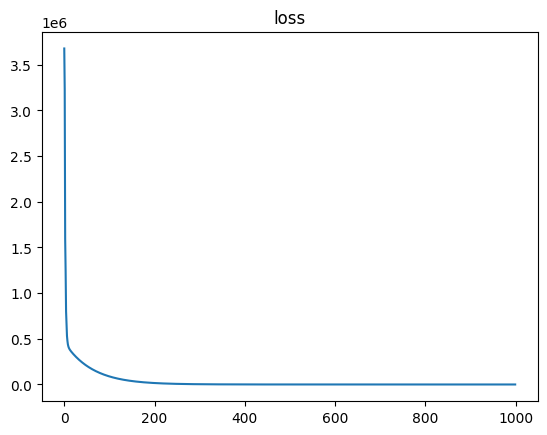

In [24]:
net.train(1000)

### test

In [18]:
test = np.array([[505,404,303,202,101]])

In [19]:
ans = generate_y(test)
ans

array([3535])

In [20]:
net.predict(test)

array([[3535.01405808]])